#### Derivatives  
* The impact of parameter on the output
* The slope  
* Numerical derivative  

Randomly changing and looking for optimal weights and biases is not fruitful as we saw previously for one main reason,, the possible combinations of weights and biases is infinite and we need some smarter method besides pure luch to achieve any success. Each weight and bias may also influence the loss in different degrees, this depends on the parameters themselves as well as the current sample, which is an input to the first layer. These inputs are then multiplied by the weights, so input data affect the neuron´s output and affects the impact that the weights make on the loss. Same principle affect the biases and parameters in the next layer, taking previous layers output as inputs. Both parameters and sampls impact the output values. The function of how the weight and the bias impact the overall loss is not necessarily linear.To be able know *how* to adjust the weights and biases we first need to understand their impact on the loss.  
  
Even though we calculate the loss from the model´s output, not weights/biases, the latter directly impact the loss.  
  
In coming sections we will describe how this happens by explaining partial derivatives, gradients, gradient descent and backpropagation. We will calculate how much each singular weith and bias changes the loss value, how much impact it has on it, given a sample (as each sample produces a separate output and thus also a separate loss value).  
  
Our goal here is to decrease loss, we will do this using gradient descent. Gradient, on the other hand, is a result of the calculation of the partial derivatives and we will backpropagate it using the chain rule to update all of the weights and biases.  
  
To understand partial derivatives, we start first by derivatives, which is a special case of partial derivatives, they are calculated from functions taking single parameters.  
  
**The impact of a Parameter on the Output**  
  
Start with a simple function that takes x as an input:

In [1]:
def f(x):
    return 2*x

We also create some code to visualize the data and create an array of 5 inputs, calculate the function output for each of the input values and plot the result as lines between consecutive points. These points coordinates are inputs as x and function outputs as y:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[0 2 4 6 8]


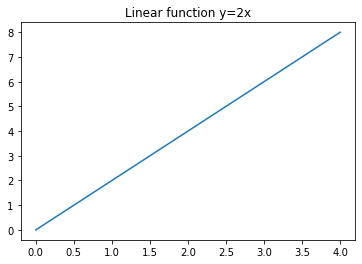

In [4]:
plt.plot(x,y)
plt.title("Linear function y=2x")
plt.show()

**The Slope**  
The above line looks like an outpu of the f(x) = 2x. How to define the impact x will have on y? We can say that y is double x. The impact of a linear function can be describes using algebra as the slope. The slope of a line is:  
  
Change in y / Change in x  
  
Also describe as delta y divided by delta x.  
  
Slope = delta y / delta x  
  
point1 = [0,0] (x,y)  
point2 = [1,2]  
  
delta x = 1-0 = 1  
delta y = 2-0 = 2  

Slope = 2/1 = 2

In [5]:
# calculate the slope using numpy

print((y[1]-y[0]) / (x[1]-x[0]))

2.0


The slope of 2 in this case is quite obvious, but what about a nonlinear function like:  
f(x) = 2x^2 

In [9]:
def f(x):
    return 2*x**2

This function creates a graph that is not a straing line. Can we measure the slope of this curve? Depending on which 2 points we choose to use, we will measure varying slopes.

In [10]:
# Calculate function outputs for new function
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[ 0  2  8 18 32]


In [11]:
# point 1
print((y[1]-y[0]) / (x[1]-x[0]))

2.0


In [12]:
# point 2
print((y[3]-y[2]) / (x[3]-x[2]))

10.0


How can we measure the impact that x has on y in this nonlinear function? Calculus propose we measure the slope of **the tangent line** at x (for a specific input value to the function),giving us the **instantenous slope** (slope in that point), which is the **derivative**. The tangent line is created by drawing a line between two points that are "infinitely close" on a curve, but the curve has to be differentiable at the derivationpoint.  
  
Since this is a curve, there is no single slope. The slope depends on where we measure it. As an example we can approximate a derivative of the function at x by using this point and another one also taken at x, but with a very small delta added to it, let´s say 0.0001. This is a common choice since it does not introduce too large error or cause the whole expression to be numerically unstable.  

In [13]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta  # add a delta

y1 = f(x1) # result at the derivative point
y2 = f(x2) # result at the other, close point

approximate_derivative = (y2-y1)/(x2-x1)
print(approximate_derivative)

4.0001999999987845


This result is very close to the derivative of 2x^2 at x=1 which is 4. The difference comes from the method used to compute the tangent. We chose a small enough delta to approximate the derivative as accurately as possible while large enough to prevent a rounding error. Our delta cannot surpass the limitations of Python´s floating-point precision (cant be too small as it might be rounded to 0). Our solution here then has a small visible error but on the other hand it remains numerically stable.

**The Numerical Derivative**  
This method of calculating the derivative is called the numerical differentiation, calculating the slpe of the tangent line using two *infinitely* close points, or as in the code example the tangent line from two points that are "sufficiently close". Now we will visualize the lines and how they change depending on where we calculate them. We start by making the graph of the function more grannular using numpy´s `arrange()`, this allows us to plot smaller steps. This function takes `start, stop` and `step` parameters, so we can take fractions of steps like 0.001 at the time.

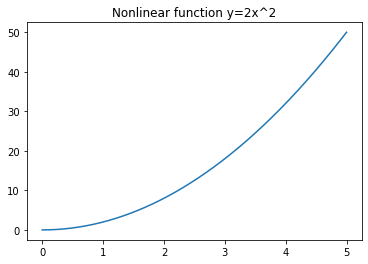

In [17]:
import matplotlib.pyplot as pl
import numpy as np

def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give a smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.title("Nonlinear function y=2x^2")
plt.plot(x,y)
plt.show()

To draw the tangent lines, we will derive the function for the tangent line at a point and plot it on the graph at that point. The function is a straight line *y = mx + b*. Where *m* is the *approximate derivative* that we already calculated and x is the input and b is the y-intercept for us to calculate. To calculate b, the formula is *b = y - m*. Given this equation for *b*, the approximation of the derivative and the same "close enough" point (x and y coordinates) we can substitute them in the equation and get the y-intercept for the tangent line at the derivative point:

In [16]:
b = y2 - approximate_derivative*x2

print(y2)
print(x2)
print(b)

2.00040002
1.0001
-2.0001999999987845


(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785


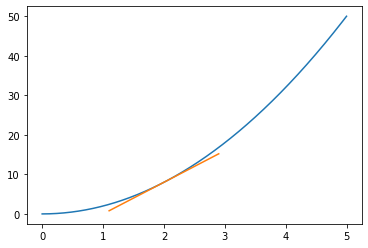

In [24]:
# Putting it together

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# np arange(start, stop, step) to give smoother line
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)

# the point and the "close enough" point
p2_delta = 0.0001
x1 = 2
x2 = x1+p2_delta

y1 = f(x1)
y2 = f(x2)

print((x1, y1), (x2, y2))

# Derivative approximation and y-intercept for the tangent line
approximate_derivative = (y2-y1)/(x2-x1)
b = y2 - approximate_derivative*x2

# We put the tangent line calculation into a function we it can be called multiple times for diff values of x
# approximate_derivatie and b are constans for the given function thus calculated once above this funciton
def tangent_line(x):
    return approximate_derivative*x + b

# Plotting the tangent line, +/- 0.9 to draw the tangent line on the graph then we can calculate the y for
# given x using the tangent_line function
# matplot lib will draw the line for us through these points
to_plot = [x1-0.9, x1, x1+0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

print('Approximate derivative for f(x)',
     f'where x = {x1} is {approximate_derivative}')

plt.show()

The orange line is the approximate tangen line at x = 2 for the function f(x) = 2x^2. We care only about the *slope* of this tangent line but both visualizing and understanding the **tangent line** are important. The slope the the tangent line informs us about the *impact* that x has on this function at a particula point, called also the **instantaneous rate of change**. We will use this concept to determine the effect of a specific weight or bias on the overall loss function given a sample. We contnue above and add tangen lines at various inputs of x.

(0, 0) (0.0001, 2e-08)
Approxaimte derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approxaimte derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approxaimte derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approxaimte derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approxaimte derivative for f(x) where x = 4 is 16.000200000016548


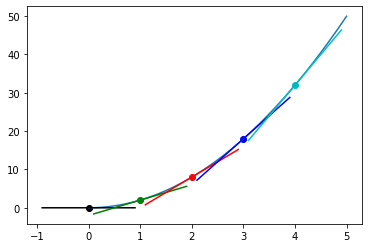

In [26]:
# Multiple tangent lines to the graph
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# np arange(start, stop, step) to give smoother line
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)

colors = ['k', 'g', 'r', 'b', 'c']

def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative*x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta
    
    y1 = f(x1)
    y2 = f(x2)
    
    print((x1, y1), (x2, y2))
    approximate_derivative = ((y2-y1)/(x2-x1))
    b = y2-(approximate_derivative*x2)

    to_plot = [x1-0.9, x1, x1+0.9]
    
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative)
                 for point in to_plot],
             c=colors[i])
    
    print('Approxaimte derivative for f(x)',
         f'where x = {x1} is {approximate_derivative}')

plt.show()

For this simple function, f(x) = 2x^2, we didn´t pay a high penalty by approximating the derivative like this, and reeived a value that was close enought for our needs.  
  
The problem is that the actual function in our neural network is not so simple. The loss function contains all of the layers, weights and biases - it is an massive function that is operating multiple dimension. Calculating derivatives using **numerical differentiation** requires multiple forward passes for a single parameter update (talk about this in ch 10). We need to perform forward pass thgouth the model again to see the change of the loss value. Next we need to calculate the **derivative** and revert the parameter change that we made for this calculation. We must repeat this for every weight and bias and for every sample, which will be very time-consuming. We can think of this method as brute forcing the derivative calculations.  
  
In this chapter we covered **derivative** and the **slope** of the **tangent line** for a function that takes a single parameter as input. We will use this to calcualte the slopes of the loss function at each of the weight and bias points, this bring us to the multivarate function, which is a function that takes multiple parameters and is the topic for next part, the partial derivative.